# Exercise: home credit default risk

## Dataset description

The dataset `train.csv` contains the some **information about the loans**; the source is Kaggle https://www.kaggle.com/c/home-credit-default-risk.

Each record refers to a specific dossier, uniquely identified by the `ID` variable
The `TARGET` represents the payment performance and can assume the following values:

* 1 - customer with some difficulties in repaying his debt
* 0 - otherwise

The aim is to **build a model that can predict the payment performance for the next loan requests**, based on some **predictors**:

**Socio-demo info**
* `GENDER`/ `NAME_FAMILY_STATUS`/ `CNT_CHILDREN`/ `CNT_FAM_MEMBERS`: client's gender / family status of the client / number of children / number of family members
* `OCCUPATION_TYPE`/  `ORGANIZATION_TYPE`: what kind of occupation does the client have and employers origanization type
* `DAYS_AGE`: Client's age in days at the time of application
* `DAYS_EMPLOYMENT`: How many days before the application the person started its current employment
* `DAYS_ID_PUBLISH`: how many days before the application did client change the identity document
* `NAME_EDUCATION_TYPE`: level of highest education the client achieved
* `FLAG_PHONE`/ `FLAG_MOBIL`/ `FLAG_WORK_PHONE`/ `FLAG_EMP_PHONE`: if client provided home / mobile / work / employers * phones
* `FLAG_CONT_MOBLE`: was mobile phone reachable
* `FLAG_EMAIL`: Did client provide email
* `REG_REGION_NOT_LIVE_REGION`: Flag if client's permanent address does not match contact address
* `REG_REGION_NOT_WORK_REGION`: Flag if client's permanent address does not match work address
* `LIVE_REGION_NOT_WORK_REGION`: Flag if client's contact address does not match work address
* `REG_CITY_NOT_LIVE_CITY`: Flag if client's permanent address does not match contact address
* `REG_CITY_NOT_WORK_CITY`: Flag if client's permanent address does not match work address
* `LIVE_CITY_NOT_WORK_CITY`: Flag if client's contact address does not match work address

**Income info**
* `NAME_HOUSING_TYPE`:housing situation of the client (renting, living with parents, ...)
* `AMT_INCOME_TOTAL` and `NAME_INCOME_TYPE`: income of the client and clients income type (businessman, working, maternity leave, ...)
* `FLAG_OWN_CAR (OWN_CAR_AGE)` and `FLAG_OWN_REALTY`:respectively flag if client owns a car (and its age) or a house (flat)

**Behavioral info**
* `NAME_TYPE_SUITE:` who was accompanying client when he was applying for the loan
* `WEEKDAY_APPR_PROCESS_START` / `HOUR_APPR_PROCESS_START`: on which day of the week / hour did the client apply for the loan

**Residence info. The various _TAG suffixes correspond to the average (_AVG), modus (_MODE) and median (_MEDI)**
* `APARTMENTS_TAG`: apartments size
* `YEARS_BUILD_TAG`: age of buildings
* `ELEVATORS_TAG`: number of elevators
* `ENTRANCES_TAG`: number of entrances
* `FLOORSMIN_TAG` /  `FLOORSMAX_TAG`: number of floors
* `HOUSETYPE_MODE`: house type
* `TOTAL_AREA_MODE`: total area
* `WALLSMATERIAL_MODE`: walls material
* `REGION_RATING_CLIENT` / `REGION_RATING_CLIENT_W_CIY`: Home Credit's rating of the region where client lives / accounting for the city

**Loan info**
*  `AMT_CREDIT`: amount of the loan
*  `AMT_ANNUITY`: loan annuity
* `NAME_CONTRACT_TYPE`: indicates if loan is cash or revolving
* `AMT_GOODS_PRICE`: for consumer loans it is the price of the goods for which the loan is given

**Bureau Scores**
* `EXT_SOURCE_1` / `EXT_SOURCE_2` / `EXT_SOURCE_3` / `EXT_SOURCE_4`: normalized scores from external data source
* `AMT_REQ_CREDIT_BUREAU_tag ` with tag in [HOUR, DAY, WEEK, MON, QRT, YEAR]: number of enquiries to Credit Bureau about the client one hour (day, week, ...) before application
* `OBS_30_CNT_SOCIAL_CIRCLE` / `DEF_30_CNT_SOCIAL_CIRCLE`: nb. of observations of client's social surroundings observed 30 days past due and how many defaulted
* `OBS_60_CNT_SOCIAL_CIRCLE` / `DEF_60_CNT_SOCIAL_CIRCLE`: nb. of observations of client's social surroundings observed 60 days past due and how many defaulted

## Section 1: Data Preparation##

Before any analysis, it is strongly suggested to clean and prepare the data:

1. Exclude the numerical variables with more than the 30% of **missing** values
2. **Exclude from the validation set**(`validazione.csv`) the columns not included in the train set
3. **Identify** the set of variables to use for predictions
4. **Sample** the train set in `develop` (60%) and `test` (40%)
5. Impute the  **missing values** of the continuous variables with the median and assign 'No Value' to the missing data of the categorical variables. Apply the same imputation also to the validation set 
6. Recode the categorical variables by using the **label encoder**. Apply the same imputation also to the validation set 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import phik
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency

In [619]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [620]:
# Import the dataset
df = pd.read_csv('train.csv')
df.shape

(215257, 102)

In [621]:
df.head(6)

,ID,NAME_CONTRACT_TYPE,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_AGE,DAYS_EMPLOYMENT,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BUILD_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BUILD_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BUILD_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_4,TARGET
0,160132,Cash loans,F,N,Y,0,427500.0,1288350.0,37800.0,1125000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,-22008,365243,-4584,NaN,1,0,1,0,0,NaN,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,NaN,0.334914,0.365904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,5.0,0.242982,0
1,233132,Cash loans,M,Y,Y,0,180000.0,848745.0,40963.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-8506,-313,-1172,12.0,1,0,1,0,0,Waiters/barmen staff,1.0,1,1,FRIDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.510027,NaN,0.0113,NaN,NaN,0.1034,0.3750,NaN,0.1360,NaN,0.0284,0.0116,NaN,NaN,0.1034,0.3750,NaN,0.1417,NaN,0.0300,0.0115,NaN,NaN,0.1034,0.3750,NaN,0.1384,NaN,0.0290,NaN,0.1131,"Stone, brick",2.0,0.0,2.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.115508,0
2,307771,Cash loans,M,Y,Y,1,112500.0,385164.0,19795.5,292500.0,"Spouse, partner",Working,Secondary / secondary special,Married,Rented apartment,-11579,-2651,-3736,11.0,1,0,1,0,0,Drivers,3.0,2,2,TUESDAY,13,0,0,0,0,1,1,Transport: type 3,0.116012,0.555162,0.039569,0.1753,0.8164,0.00,0.4138,0.1667,0.2083,0.1582,0.0,0.0454,0.1786,0.8236,0.0000,0.4138,0.1667,0.2083,0.1648,0.0,0.0481,0.1770,0.8189,0.00,0.4138,0.1667,0.2083,0.1610,0.0,0.0464,block of flats,0.1491,Panel,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.393106,0
3,376452,Cash loans,F,N,Y,0,540000.0,1433520.0,60867.0,1237500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-21179,365243,-4628,NaN,1,0,1,0,0,NaN,2.0,1,1,FRIDAY,16,0,0,0,0,0,0,XNA,0.839238,0.730635,0.152156,0.2887,0.8300,0.28,0.2414,0.3750,0.4167,0.2879,0.0,0.0000,0.2941,0.8367,0.2820,0.2414,0.3750,0.4167,0.3000,0.0,0.0000,0.2915,0.8323,0.28,0.2414,0.3750,0.4167,0.2931,0.0,0.0000,block of flats,0.2633,Panel,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.455985,0
4,405403,Cash loans,M,Y,Y,0,76500.0,900000.0,26316.0,900000.0,Unaccompanied,Working,Secondary / secondary sp

In [622]:
#df.info(verbose=True, null_counts=True)

In [623]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]

In [624]:
missing_columns(df)

,Missing Count,Missing Count Ratio,Missing Count %
NONLIVINGAPARTMENTS_MODE,149323,0.693696,69.4
NONLIVINGAPARTMENTS_MEDI,149323,0.693696,69.4
NONLIVINGAPARTMENTS_AVG,149323,0.693696,69.4
FLOORSMIN_MEDI,145861,0.677613,67.8
FLOORSMIN_AVG,145861,0.677613,67.8
FLOORSMIN_MODE,145861,0.677613,67.8
YEARS_BUILD_MODE,142965,0.664160,66.4
YEARS_BUILD_AVG,142965,0.664160,66.4
YEARS_BUILD_MEDI,142965,0.664160,66.4
OWN_CAR_AGE,141952,0.659454,65.9


Distribution over the target value

C:\Users\peppe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

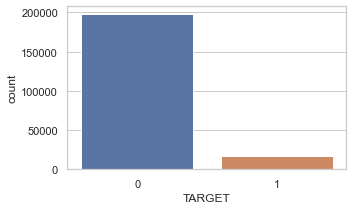

In [625]:
sns.set(rc={'figure.figsize':(5,3)}, font_scale=1, style='whitegrid')
sns.countplot(df.TARGET)

In [626]:
print(df['TARGET'].value_counts())
print(df['TARGET'].value_counts(normalize=True)*100)

0    197809
1     17448
Name: TARGET, dtype: int64
0    91.89434
1     8.10566
Name: TARGET, dtype: float64


This is clearly an imbalanced target. There are more number of people who returned - 0 as opposed to people who had difficulties -1. About 91.89 % of loans requested are repayed.
Also there are very few people who actually have problems in repaying, this is why they should show some sort of different behaviour. That is why since outlier can provide useful information to these kind of customers we need to focus on outliers too, and we cannot remove them, as they could be the differentiating factor between someone who can pay the loan and someone who can't.

# DATA CLEANING

Removing the rows with more than 1/3 of their columns entries as Nan,but since we are in an umbalanced dataset, we are doing that only for the sample of the majority class, in order to not delete  records from the class 1

In [627]:
dfmajority=df[df.TARGET == 0]
dfmajority = dfmajority.dropna(thresh=dfmajority.shape[1]-(round(len(dfmajority.columns)/3)))
dfminority=df[df.TARGET == 1]
frames = [dfmajority, dfminority]
df=pd.concat(frames)
df.shape

(201560, 102)

In [628]:
print(df['TARGET'].value_counts())
print(df['TARGET'].value_counts(normalize=True)*100)

0    184112
1     17448
Name: TARGET, dtype: int64
0    91.343521
1     8.656479
Name: TARGET, dtype: float64


We passed from 215257 records at the beginning to 201560

Since we want to divide the df in a numerical and a categorical one for the next analysis and since selecting the columns only by type is not enough since seems we have already some encoded categorical features wich can be considered by mistake, we create a list of the categorical columns to use for the split

In [629]:
categorical_columns = ['TARGET','FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                   'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                                  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                                'LIVE_CITY_NOT_WORK_CITY'] + ['FLAG_DOCUMENT_' + str(i) for i in range(2,22)] + df.dtypes[
                                    df.dtypes == 'object'].index.tolist()


In [630]:
dfnum=df.drop(categorical_columns,axis=1)
dfnum.shape

(201560, 54)

In [631]:
#Function in wich I determine the treshold for removing columns with NaN values, params are the dataframe and the desired percentage
def thresholdfornan(df,percentage):
    threshold=int(round(len(df.index)-(len(df.index)*(percentage/100)),0))
    return threshold
#This means features with at least 141092 records will not be excluded
print(thresholdfornan(dfnum,30))

141092


In [632]:
dfnum=dfnum.dropna(thresh=thresholdfornan(dfnum,30),axis=1) 
dfnum.shape

(201560, 24)

In dfnum we already removed columns with more than 30% of records missing so we impute the mean value for the rest

In [633]:
for column in dfnum:
    dfnum[column]=dfnum[column].fillna(dfnum[column].mean())   

Creating the categorical df

In [634]:
numerical_columns=df.columns.to_list()
for col in categorical_columns:
    if col in numerical_columns:
        numerical_columns.remove(col)

In [635]:
dfcat=df.drop(numerical_columns,1)

C:\Users\peppe\AppData\Local\Temp/ipykernel_11836/3313327183.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfcat=df.drop(numerical_columns,1)


Determing the treshold for decide the columns in wich I impute the Nan values and the columns in wich I create the new category 'no_value', a threshold of 30% was decided.

In [636]:
def thresholdfornancat(df,percentage):
    threshold=int(round((len(df.index)*(percentage/100)),0))
    return threshold
print(thresholdfornancat(dfcat,30))

60468


In dfcat we are creating a new type of record called 'No Value' for the features with more than 30% of records as Nan, we are replacing with the mode for the others

In [637]:
for column in dfcat:
    if dfcat[column].isna().sum() >= thresholdfornancat(dfcat,30):
        dfcat[column]=dfcat[column].replace(np.nan, 'No Value')
    else:
        dfcat[column]=dfcat[column].fillna(dfcat[column].mode().iloc[0])

In [638]:
dfcat['ID']=dfnum['ID']
dfnum=dfnum.set_index('ID')
dfcat=dfcat.set_index('ID')
print(dfnum.shape)
dfcat.shape

(201560, 23)


(201560, 48)

In [639]:
dfnum.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_AGE,DAYS_EMPLOYMENT,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_4
ID,,,,,,,,,,,,,,,,,,,,,,,
160132,0,427500.0,1288350.0,37800.0,1125000.0,-22008,365243,-4584,1.0,15,0.334914,0.365904,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.242982
233132,0,180000.0,848745.0,40963.5,675000.0,-8506,-313,-1172,1.0,12,0.510027,0.254992,2.0,0.0,2.0,0.0,0.006493,0.006944,0.034523,0.268352,0.265313,1.901606,0.115508
307771,1,112500.0,385164.0,19795.5,292500.0,-11579,-2651,-3736,3.0,13,0.555162,0.039569,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.393106
376452,0,540000.0,1433520.0,60867.0,1237500.0,-21179,365243,-4628,2.0,16,0.730635,0.152156,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.455985
405403,0,76500.0,900000.0,26316.0,900000.0,-21210,-13767,-4427,2.0,9,0.634374,0.368668,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.141508


In [640]:
dfcat.head()

,NAME_CONTRACT_TYPE,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
160132,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,1,0,0,No Value,2,2,MONDAY,0,0,0,0,0,0,XNA,No Value,No Value,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
233132,Cash loans,M,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,0,0,Waiters/barmen staff,1,1,FRIDAY,0,0,0,0,0,0,Business Entity Type 3,No Value,"Stone, brick",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307771,Cash loans,M,Y,Y,"Spouse, partner",Working,Secondary / secondary special,Married,Rented apartment,1,0,1,0,0,Drivers,2,2,TUESDAY,0,0,0,0,1,1,Transport: type 3,block of flats,Panel,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
376452,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,0,0,No Value,1,1,FRIDAY,0,0,0,0,0,0,XNA,block of flats,Panel,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
405403,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,0,Drivers,3,3,THURSDAY,0,0,0,0,0,0,Medicine,No Value,No Value,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Correlation

To obtain the correlation between the features of the dataset 3 different methods were used

-The correlation for the numerical variables with a correlation matrix.

-The Phi_k correlation for the categorical ones 

However since Phi_k works consistently between categorical, ordinal and interval variables, captures non-linear dependency and reverts to the Pearson correlation coefficient in case of a bi-variate normal input distribution, we decided to use it for compute the correlation between both categorical and numerical attributes,in order to evaluate the correlation with the target: in this way we can understand wich features between continuous and categorical ones are the most correlated with the target.

Correlation between numerical attributes

In [641]:
class correlation_matrix:
    '''
    Class to plot heatmap of Correlation Matrix and print Top Correlated Features with Target.
    Contains three methods:
        1. init method
        2. plot_correlation_matrix method
        3. target_top_corr method
    '''
    
    def __init__(self, data, columns_to_drop, figsize = (25,23), mask_upper = True, tight_layout = True, 
                  linewidth = 0.1, fontsize = 10, cmap = 'Blues'):  
        '''  
        Function to initialize the class members. 
        
        Inputs:
            data: DataFrame
                The DataFrame from which to build correlation matrix
            columns_to_drop: list
                Columns which have to be dropped while building the correlation matrix (for example the Loan ID)
            figsize: tuple, default = (25,23)
                Size of the figure to be plotted
            mask_upper: bool, default = True
                Whether to plot only the lower triangle of heatmap or plot full.
            tight_layout: bool, default = True
                Whether to keep tight layout or not
            linewidth: float/int, default = 0.1
                The linewidth to use for heatmap
            fontsize: int, default = 10
                The font size for the X and Y tick labels
            cmap: str, default = 'Blues'
                The colormap to be used for heatmap

        Returns:
            None
        '''
        
        self.data = data
        self.columns_to_drop = columns_to_drop
        self.figsize = figsize
        self.mask_upper = mask_upper
        self.tight_layout = tight_layout
        self.linewidth = linewidth
        self.fontsize = fontsize
        self.cmap = cmap 
                 
    def plot_correlation_matrix(self):
        import numpy as np
        '''
        Function to plot the Correlation Matrix Heatmap
        
        Inputs:
            self
        
        Returns:
            None
        '''
        
        print('-' * 100)
        #building the correlation dataframe
        self.corr_data = self.data.drop(self.columns_to_drop + ['TARGET'], axis = 1).corr()

        if self.mask_upper:
            
            #masking the heatmap to show only lower triangle. This is to save the RAM.
            mask_array = np.ones(self.corr_data.shape)
            mask_array = np.triu(mask_array)
        else:
            mask_array = np.zeros(self.corr_data.shape)

        plt.figure(figsize = self.figsize, tight_layout = self.tight_layout)
        sns.heatmap(self.corr_data, annot = False, mask = mask_array, linewidth = self.linewidth,cmap = self.cmap)
        plt.xticks(rotation = 90, fontsize = self.fontsize)
        plt.yticks(fontsize = self.fontsize)
        plt.title("Correlation Heatmap for Numerical features")
        plt.show()
        print("-"*100)
    def target_top_corr(self, target_top_columns = 10):
        '''
        Function to return the Top Correlated features with the Target
        
        Inputs:
            self
            target_top_columns: int, default = 10
                The number of top correlated features with target to display
            
        Returns:
            Top correlated features DataFrame.
        '''
        
        phik_target_arr = np.zeros(self.corr_data.shape[1])
        #calculating the Phik-Correlation with Target
        for index, column in enumerate(self.corr_data.columns):
            phik_target_arr[index] = self.data[['TARGET', column]].phik_matrix().iloc[0,1]
        #getting the top correlated columns and their values
        top_corr_target_df = pd.DataFrame({'Column Name': self.corr_data.columns, 'Phik-Correlation' : phik_target_arr})
        top_corr_target_df = top_corr_target_df.sort_values(by = 'Phik-Correlation', ascending = False)
        
        return top_corr_target_df.iloc[:target_top_columns]

In [642]:
lista=dfnum.columns.to_list()
columns_to_drop=df.columns.to_list()
for col in columns_to_drop:
    if col in lista:
        columns_to_drop.remove(col)
columns_to_drop.remove('TARGET')

----------------------------------------------------------------------------------------------------


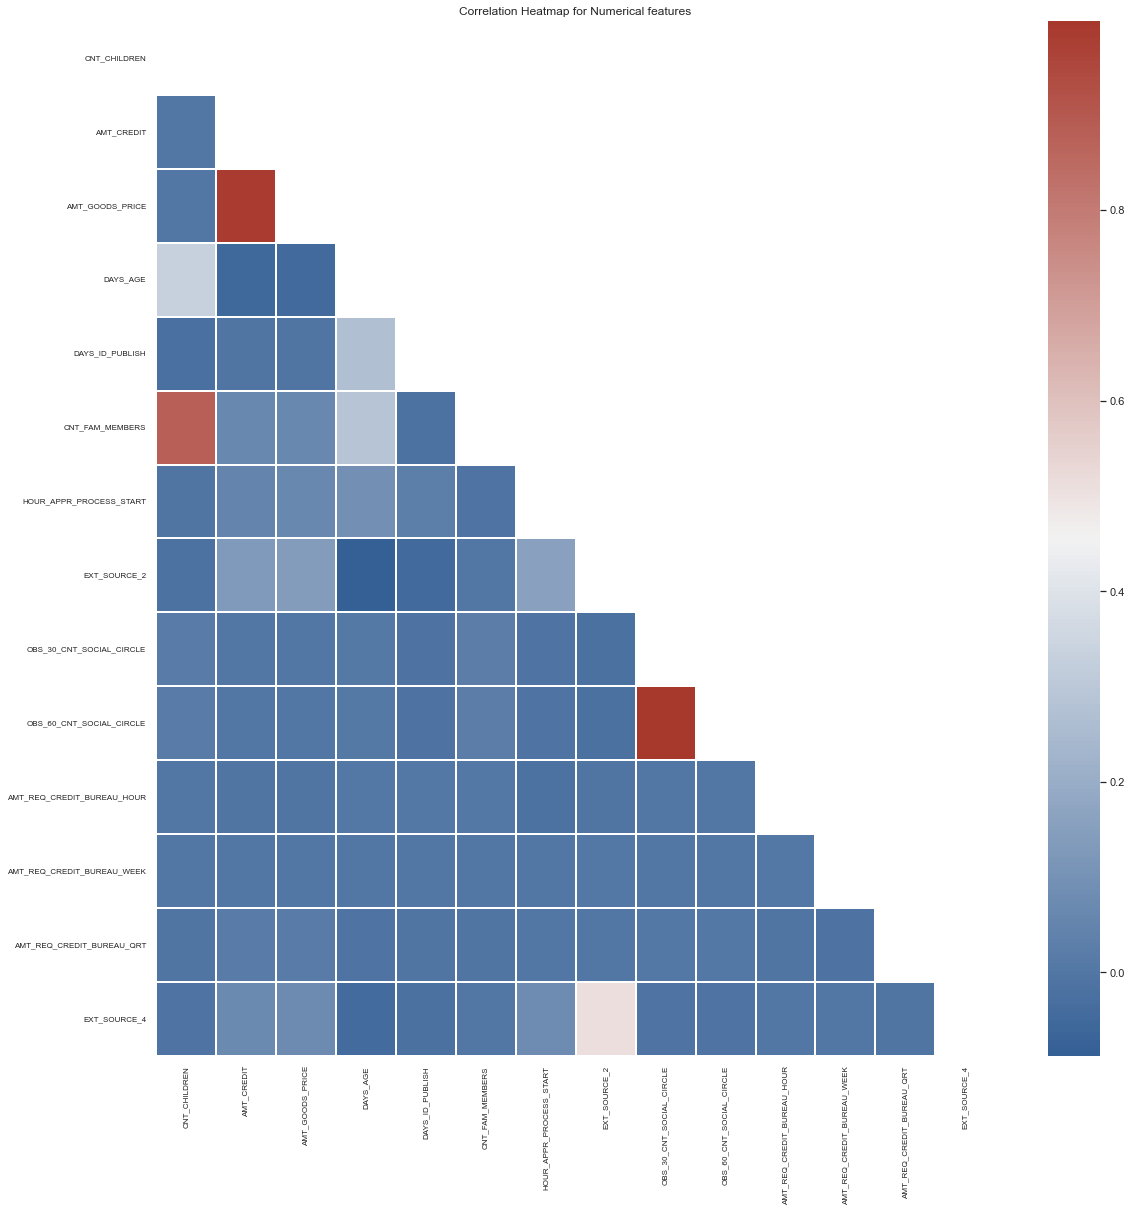

----------------------------------------------------------------------------------------------------


In [643]:
#columns_to_drop =['ID']+list(set(categorical_columns) - set(['TARGET']))
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="light", as_cmap=True)
corr_mat = correlation_matrix(df, columns_to_drop, figsize = (17,17), fontsize = 8, cmap = cmap)
corr_mat.plot_correlation_matrix()

In [644]:
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'CNT_CHILDREN']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT']
interval columns not set, guessing: ['TARGET', 'AMT_GOODS_PRICE']
interval columns not set, guessing: ['TARGET', 'DAYS_AGE']
interval columns not set, guessing: ['TARGET', 'DAYS_ID_PUBLISH']
interval columns not set, guessing: ['TARGET', 'CNT_FAM_MEMBERS']
interval columns not set, guessing: ['TARGET', 'HOUR_APPR_PROCESS_START']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_2']
interval columns not set, guessing: ['TARGET', 'OBS_30_CNT_SOCIAL_CIRCLE']
interval columns not set, guessing: ['TARGET', 'OBS_60_CNT_SOCIAL_CIRCLE']
interval columns not set, guessing: ['TARGET', 'AMT_REQ_CREDIT_BUREAU_HOUR']
interval columns not set, guessing: ['TARGET', 'AMT_REQ_CREDIT_BUREAU_WEEK']
interval columns not set, guessing: ['TARGET', 'AMT_REQ_CREDIT_BUREAU_QRT']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_4']
---------------------------------------

,Column Name,Phik-Correlation
7,EXT_SOURCE_2,0.226344
13,EXT_SOURCE_4,0.113758
3,DAYS_AGE,0.109277
4,DAYS_ID_PUBLISH,0.072254
2,AMT_GOODS_PRICE,0.062047
1,AMT_CREDIT,0.059991
6,HOUR_APPR_PROCESS_START,0.036359
5,CNT_FAM_MEMBERS,0.015832
0,CNT_CHILDREN,0.015019
8,OBS_30_CNT_SOCIAL_CIRCLE,0.000000


----------------------------------------------------------------------------------------------------


From the above heatmap, we see that most of our numerical features are not correlated to each other since most of the correlation matrix is lightgrey, however some of them show strong correlation, only few of them present a negative correlation.
Some of the highly correlated features pairs are:

-- OBS_30_CNT_SOCIAL_CIRCLE AND OBS_60_CNT_SOCIAL_CIRCLE 

-- AMT_CREDIT AND AMT_GOOD_PRICE

-- CNT_CHILDREN AND CNT_FAM_MEMBERS

The numerical features with highest Phik-Correlation are EXT_SOURCE_2,EXT_SOURCE_2, and DAYS_AGE

Correlation between categorical attributes

In [645]:
def plot_phik_matrix(data, categorical_columns, figsize = (20,20), mask_upper = True, tight_layout = True, linewidth = 0.1, fontsize = 10,cmap=cmap,show_target_top_corr = True, target_top_columns = 10):
    
    '''
    Function to Phi_k matrix for categorical features
    
    Inputs:
        data: DataFrame
            The DataFrame from which to build correlation matrix
        categorical_columns: list
            List of categorical columns whose PhiK values are to be plotted
        figsize: tuple, default = (25,23)
            Size of the figure to be plotted
        mask_upper: bool, default = True
            Whether to plot only the lower triangle of heatmap or plot full.
        tight_layout: bool, default = True
            Whether to keep tight layout or not
        linewidth: float/int, default = 0.1
            The linewidth to use for heatmap
        fontsize: int, default = 10
            The font size for the X and Y tick labels
        cmap: str, default = 'Blues'
            The colormap to be used for heatmap
        show_target_top_corr: bool, default = True
            Whether to show top/highly correlated features with Target.
        target_top_columns: int, default = 10
            The number of top correlated features with target to display
    '''
    
    #first fetching only the categorical features
    data_for_phik = data[categorical_columns].astype('object')
    phik_matrix = data_for_phik.phik_matrix()
    
    print('-'*100)
    
    if mask_upper:
        mask_array = np.ones(phik_matrix.shape)
        mask_array = np.triu(mask_array)
    else:
        mask_array = np.zeros(phik_matrix.shape)
        
    plt.figure(figsize = figsize, tight_layout = tight_layout)
    sns.heatmap(phik_matrix, annot = False, mask = mask_array, linewidth = linewidth, cmap = cmap)
    plt.xticks(rotation = 90, fontsize = fontsize)
    plt.yticks(rotation = 0, fontsize = fontsize)
    plt.title("Phi-K Correlation Heatmap for Categorical Features")
    plt.show()
    print("-"*100)

    if show_target_top_corr:
        #Seeing the top columns with highest correlation with the target variable in application_train
        print("Categories with highest values of Phi-K Correlation value with Target Variable are:")
        phik_df = pd.DataFrame({'Column Name' : phik_matrix.TARGET.index[1:], 'Phik-Correlation' : phik_matrix.TARGET.values[1:]})
        phik_df = phik_df.sort_values(by = 'Phik-Correlation', ascending = False)
        display(phik_df.head(target_top_columns))
        print("-"*100) 

C:\Users\peppe\anaconda3\lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable FLAG_MOBIL for analysis 1. Dropping this column
  warnings.warn(


----------------------------------------------------------------------------------------------------


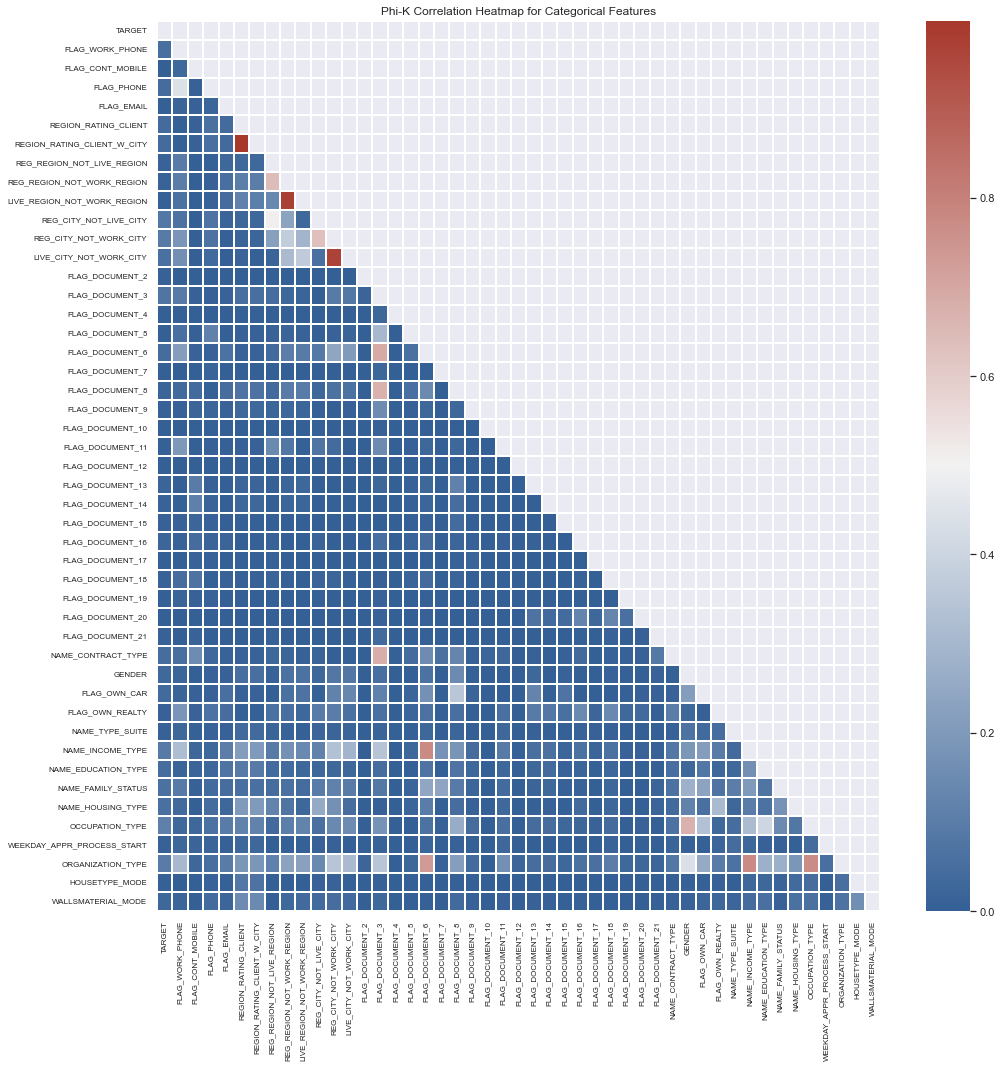

----------------------------------------------------------------------------------------------------
Categories with highest values of Phi-K Correlation value with Target Variable are:


,Column Name,Phik-Correlation
41,OCCUPATION_TYPE,0.112230
43,ORGANIZATION_TYPE,0.096203
10,REG_CITY_NOT_WORK_CITY,0.090990
37,NAME_INCOME_TYPE,0.090568
9,REG_CITY_NOT_LIVE_CITY,0.083429
13,FLAG_DOCUMENT_3,0.074905
39,NAME_FAMILY_STATUS,0.059239
40,NAME_HOUSING_TYPE,0.057902
11,LIVE_CITY_NOT_WORK_CITY,0.057324
0,FLAG_WORK_PHONE,0.050955


----------------------------------------------------------------------------------------------------


In [646]:
sns.set()
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="light", as_cmap=True)
plot_phik_matrix(df, categorical_columns, figsize = (15,15),cmap=cmap,fontsize = 8)

From the above heatmap of Phi-K Correlation, we see that most of the categorical features are not correlated to each other, however some of them show strong correlation.
Some of the highest correlated Category pairs are:

-- REG_CITY_NOT_WORK_CITY AND LIVE_CITY_NOT_WORK_CITY

-- REGION_RATING_CLIENT AND REGION_RATING_CLIENT_W_CITY

-- REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION

The features with highest correlation with respect to the target are OCCUPATION_TYPE ,ORGANIZATION_TYPE, NAME_INCOME_TYPE, and FLAG_DOCUMENT_3

In [647]:
dfnum=dfnum.reset_index()
dfcat=dfcat.reset_index()

# CHECKPOINT

In [648]:
#Making a copy of the df up to now
dfnum1=dfnum.copy()
dfcat1=dfcat.copy()

In [649]:
dfnum1.columns= map(str.lower, dfnum1.columns)
dfcat1.columns= map(str.lower, dfcat1.columns)

In [650]:
dfnum1['target']=dfcat1['target']

# Data exploration

Let s give a look at the distribution of the family-related features

<AxesSubplot:ylabel='cnt_fam_members'>

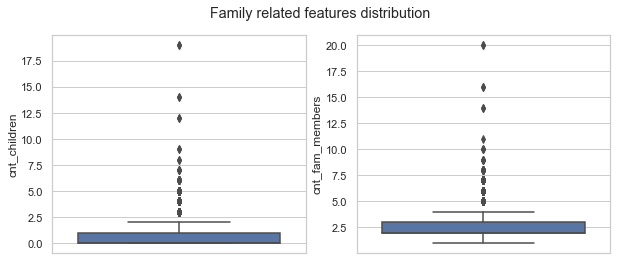

In [651]:
df_family = dfnum1[["cnt_children", "cnt_fam_members"]]
sns.set(rc={'figure.figsize':(18,8)}, font_scale=1, style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Family related features distribution ')
sns.boxplot(ax=axes[0], data=df_family, y='cnt_children')
sns.boxplot(ax=axes[1], data=df_family, y='cnt_fam_members')

It seems like few customers have more than 10 kids, it can be a mistype but we are not really sure, so we won' t delete anything from these 2 features

Let s give a look at the distribution of "days_employment" and "days_id_publish" to see their distribution

<AxesSubplot:ylabel='days_id_publish'>

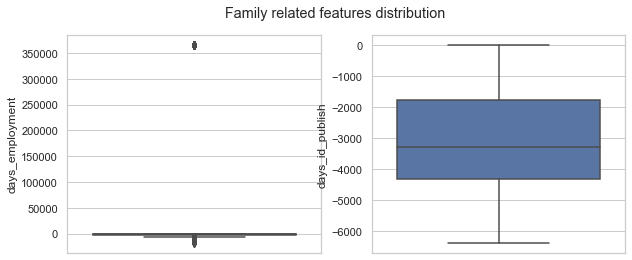

In [652]:
#DAYS_EMPLOYMENT: How many days before the application the person started its current employment
#DAYS_ID_PUBLISH: how many days before the application did client change the identity document
df_days = dfnum1[["days_employment", "days_id_publish"]]
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Family related features distribution ')
sns.boxplot(ax=axes[0], data=df_days, y='days_employment')
sns.boxplot(ax=axes[1], data=df_days, y='days_id_publish')

It seems that some records from days_employment are higher than 35000, this is humanly impossible, let's check if it is a human error or they were already imputed

In [653]:
bool_serie = dfnum1["days_employment"]>=30000
df_days_employment = dfnum1.loc[bool_serie, :]
df_days_employment.shape

(36296, 25)

There are 36079 records in wich days_employment have a value of 365243, let's create another df with all features but  only that value of days_employment to see what we can discover about working-related features 

In [654]:
dfcat2 = dfcat1.merge(df_days_employment, on='id')
print(dfcat2['name_income_type'].value_counts())
print(dfcat2['occupation_type'].value_counts())
print(dfcat2['organization_type'].value_counts())

Pensioner     36284
Unemployed       12
Name: name_income_type, dtype: int64
No Value          36294
Cleaning staff        2
Name: occupation_type, dtype: int64
XNA    36296
Name: organization_type, dtype: int64


Most person with 365243 in days_employment are pensioners,this means that probably that number was imputed in order to indicate that long time has passed since they started their current employment,this means also that "XNA" means "no organization".

How old are the customers?

In [655]:
#Transforming days_age in age by dividing by 365
dfage=dfnum1[['days_age','id']]
dfage = dfage.rename(columns={'days_age': 'age'})
dfage['age']=round((dfage['age']*(-1))/365)
dfage['age']=dfage['age'].astype(int)
dfage['age'].head()

0    60
1    23
2    32
3    58
4    58
Name: age, dtype: int32

In [656]:
#Use Sturges rule to tune bins paramater
bins=round(1+3.322*(math.log(199773)))
bins

42

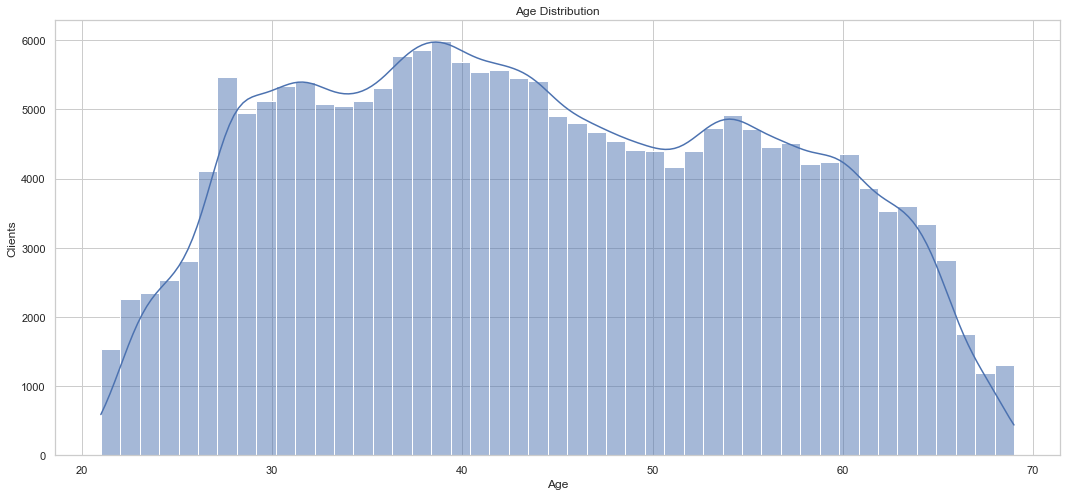

In [657]:
#After some trials starting from 42, we found that 47 is a good number of bins
sns.histplot(data=dfage,x='age',stat='count',bins=47,kde=True)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Clients')
plt.show()

The majority of our customers are between 30 and 60 years old

How many customers are male and female?

In [658]:
dfcat1['gender'].value_counts()

F      133153
M       68404
XNA         3
Name: gender, dtype: int64

Removing 'XNA 'from gender

In [659]:
dfnum1=dfnum1.set_index('id')
dfcat1=dfcat1.set_index('id')
dfcat1.index[dfcat1['gender'] == 'XNA'].tolist()

[141289, 319880, 144669]

Rows with 'XNA' are probably mistyped and also these 3 records belongs to the majority class so we can safely remove these from both dfcat1 and dfnum1

In [660]:
dfcat1 = dfcat1.drop([141289, 319880,144669],axis=0)
dfnum1 = dfnum1.drop([141289, 319880,144669],axis=0)
#deleting same rows  by index also in dfnum to avoid index mismatch when we merge later

In [661]:
#Function for show % on top of barcharts with hue param
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [662]:
#Function for show & on top of barcharts without hue param
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

Let's look at the distribution of the target value over the gender, in particular with respect of the value 1 wich is the one we should focus on

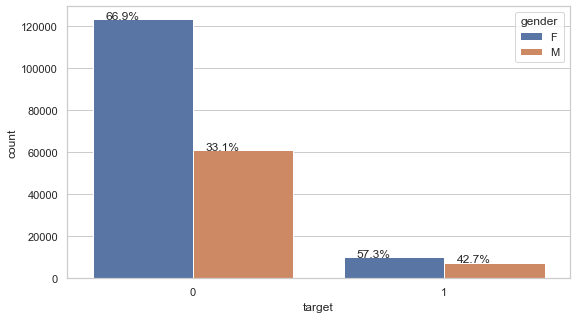

In [663]:
sns.set(rc={'figure.figsize':(18,8)}, font_scale=1, style='whitegrid')
fig, ax = plt.subplots(figsize=(9,5))
ax=sns.countplot(x='target',hue='gender',data=dfcat1)
with_hue(ax,dfcat1.target,2,2)

We can observe that, in percentage, there is a slightly more number of females (58%) wich have difficulties in repaying the debts with respect of the males (42%), this can be due to the fact that, overall, the majority of the customers are female

Let' s observe now if owning a car or a house can affect the performance on the payment of the next loan

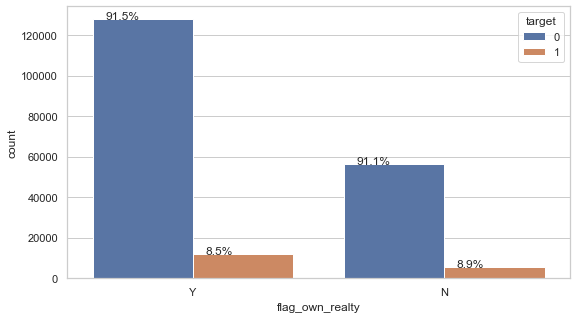

In [664]:
fig, ax = plt.subplots(figsize=(9,5))
ax=sns.countplot(x='flag_own_realty',hue='target',data=dfcat1)
with_hue(ax,dfcat1.flag_own_realty,2,2)

Looking at the chart we observe that there are more people wich cannot pay the loan and have a house, the reason may be related to the fact that the majority of the customers in the dataset own an house.
If we look at the percentage with respect to the number of customers, we can observe that there is a slightly lower amount of customers (-0.4%) who cannot afford to pay the loan but have a house

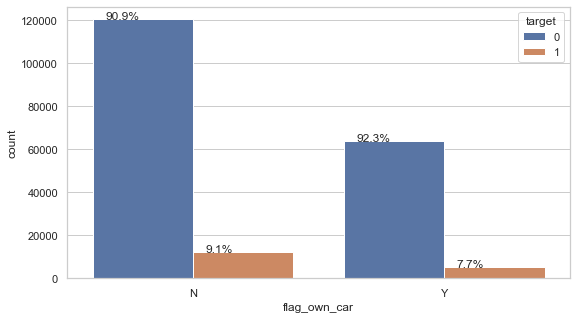

In [665]:
fig, ax = plt.subplots(figsize=(9,5))
ax=sns.countplot(x='flag_own_car',hue='target',data=dfcat1)
with_hue(ax,dfcat1.flag_own_car,2,2)

Looking at the chart we observe that there are more people wich cannot pay the loan and have a car, the reason may be related to the fact that the majority of the customers in the dataset do not own a car.
Also in terms of % with respect to the number of customers there are more customers (-1.4%) who cannot afford to pay the loan but have a care

What about the preferences by gender of the customers who cannot repay the debt? Do males and females customer behave in the same way?
Let's observe if they own a property and if they own a car when they cannot repay the loan 

In [666]:
bool_serie =dfcat1['target']==1
dfowns_house_car = dfcat1.loc[bool_serie, :]
dfowns_house_car.shape

(17448, 48)

In [668]:
colors = ["#85BB65", "#ED3E2F"]
def make_barplot(dataset,features, cols=2):
    n_features = len(features)
    rows = math.ceil(n_features / cols)
    figx = 20
    figy = 5*rows

    fig = plt.figure(figsize=(figx, figy))
    fig.set_facecolor("#fff")

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.grid(axis="y", linewidth=1, color="white", linestyle="--", zorder=1)
        sns.countplot(x=feature, data=dataset, hue='gender', palette=colors, ec="#000", alpha=1, linewidth=1.5, zorder=3)
        
        ax.set_ylabel("Count", fontsize=20, labelpad=7)
        
        ax.xaxis.set_tick_params(size=0, labelsize=9, pad=7)
        ax.yaxis.set_tick_params(size=0, labelsize=13, pad=7)
        ax.set_xlabel(feature, fontsize=20, labelpad=7)

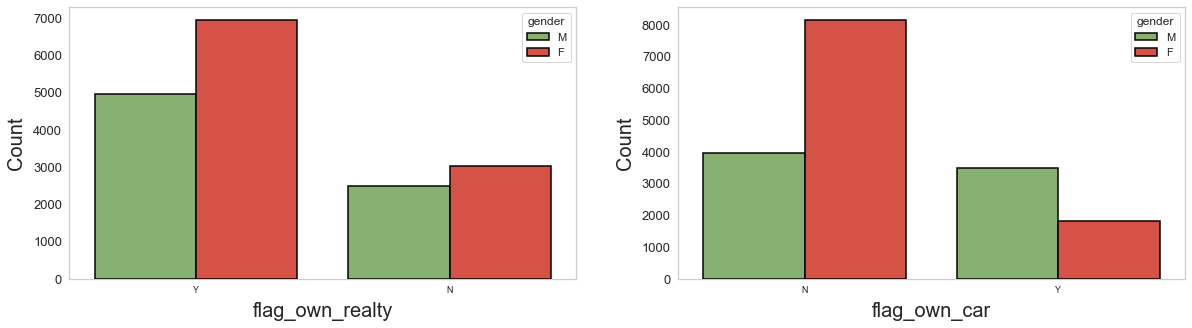

In [669]:
make_barplot(dfowns_house_car,['flag_own_realty', 'flag_own_car'])

Here we are observing only those who have difficulties in repaying their loans:
-It seems that respectively, more females that struggle with the payment owns a property but there are less females wich have a cars with respect to males
-There are instead ,between those who have hardships in repaying, slightly more males who do not own a car, so maybe for those, there are other motivations about their hardships in repaying

Let's observe, from those who have a property, what kind of property they have('housetype_mode')  and the housing situation of the clients('name_housing_type'): how and where our customers live?

In [670]:
colors = ["#85BB65", "#ED3E2F"]
def make_barplot(dataset,features, cols=2):
    n_features = len(features)
    rows = math.ceil(n_features / cols)
    figx = 20
    figy = 5*rows

    fig = plt.figure(figsize=(figx, figy))
    fig.set_facecolor("#fff")

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.grid(axis="y", linewidth=1, color="white", linestyle="--", zorder=1)
        sns.countplot(x=feature, data=dataset, hue='target', palette=colors, ec="#000", alpha=1, linewidth=1.5, zorder=3)
        
        ax.set_ylabel("Count", fontsize=20, labelpad=7)
        
        ax.xaxis.set_tick_params(size=0, labelsize=9, pad=7)
        ax.yaxis.set_tick_params(size=0, labelsize=13, pad=7)
        ax.set_xlabel(feature, fontsize=20, labelpad=7)

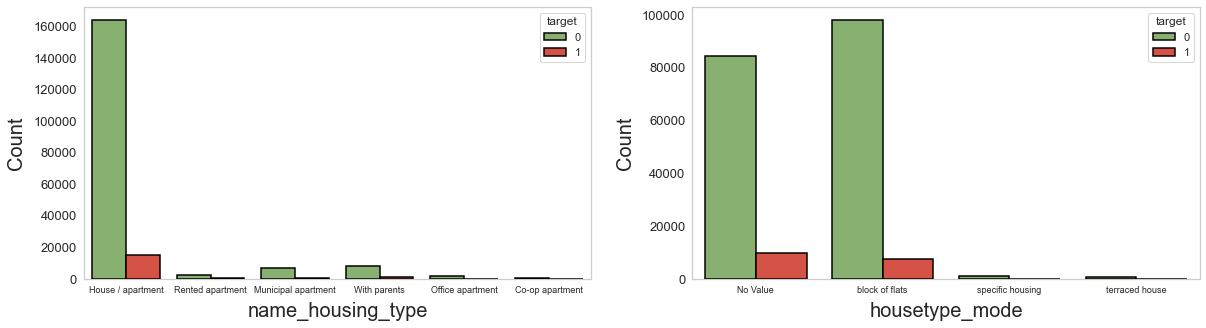

In [671]:
make_barplot(dfcat1,['name_housing_type','housetype_mode'])

Seems most of our customer live in a House/apartment, wich is most of times a block of flats.
It is interesting to notice that the majority of the customers who cannot pay live in a house, however this is not an marker for cannot pay the loan, because we already noticed, describing flag_own_realty that there are less people who cannot pay the loan but have an house, this means that House/apartment has the larger amount of customers who cannot pay just because there are a lot of people overall to live in House/apartment. 

How many customers got a certain number of children?

C:\Users\peppe\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\peppe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


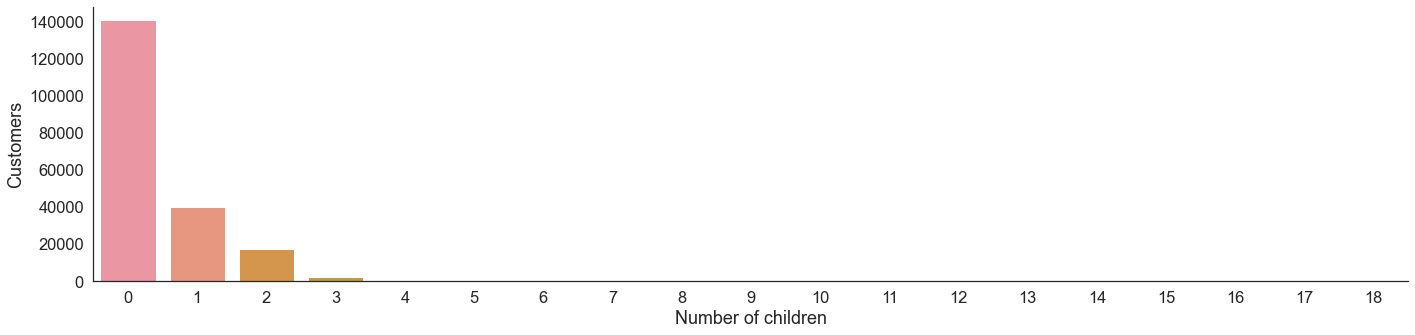

In [672]:
sns.set(rc={'figure.figsize':(18,8)}, font_scale=1.5, style='whitegrid')
with sns.axes_style('white'):
    g = sns.factorplot("cnt_children", data=dfnum1, aspect=4.0, kind='count',
                       order=range(0,19))
    g.set_ylabels('Customers')
    g.set_xlabels('Number of children')

It seems that majority of the customer don't have kids

Are children affecting the performance on the repayment?
Let's analyze first the majority of the customers, so those with up to 2 children

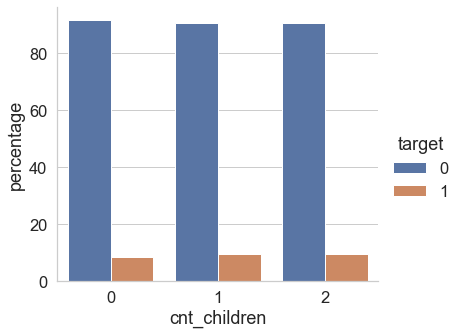

In [673]:
x,y = 'cnt_children', 'target'
(dfnum1.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percentage').reset_index().pipe((sns.catplot,'data'), x=x,y='percentage',hue=y,kind='bar',order=range(0,3)))
plt.gcf().set_size_inches(7, 5)

It seems that having a children slightly increase the chance of having problems in repaying

Let's analyze also those consider as outliers, having more children is a marker of bad performance in the payment?

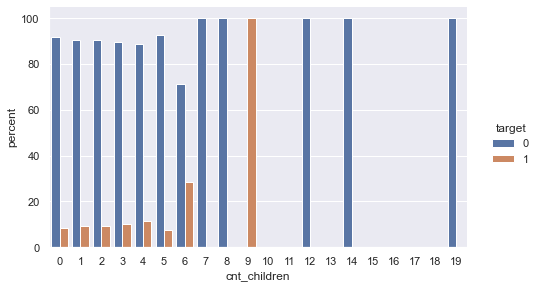

In [674]:
sns.set()
x,y = 'cnt_children', 'target'
(dfnum1.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',order=range(0,20)))
plt.gcf().set_size_inches(8, 4)

It seems that, having more children doesn't affect a lot the performance in the payment.The only exception are with 6 and 9 kids but we' re talking about very few records wich cannot be considered as a representative sample

What is the most frequent organization type?

<AxesSubplot:xlabel='count', ylabel='organization_type'>

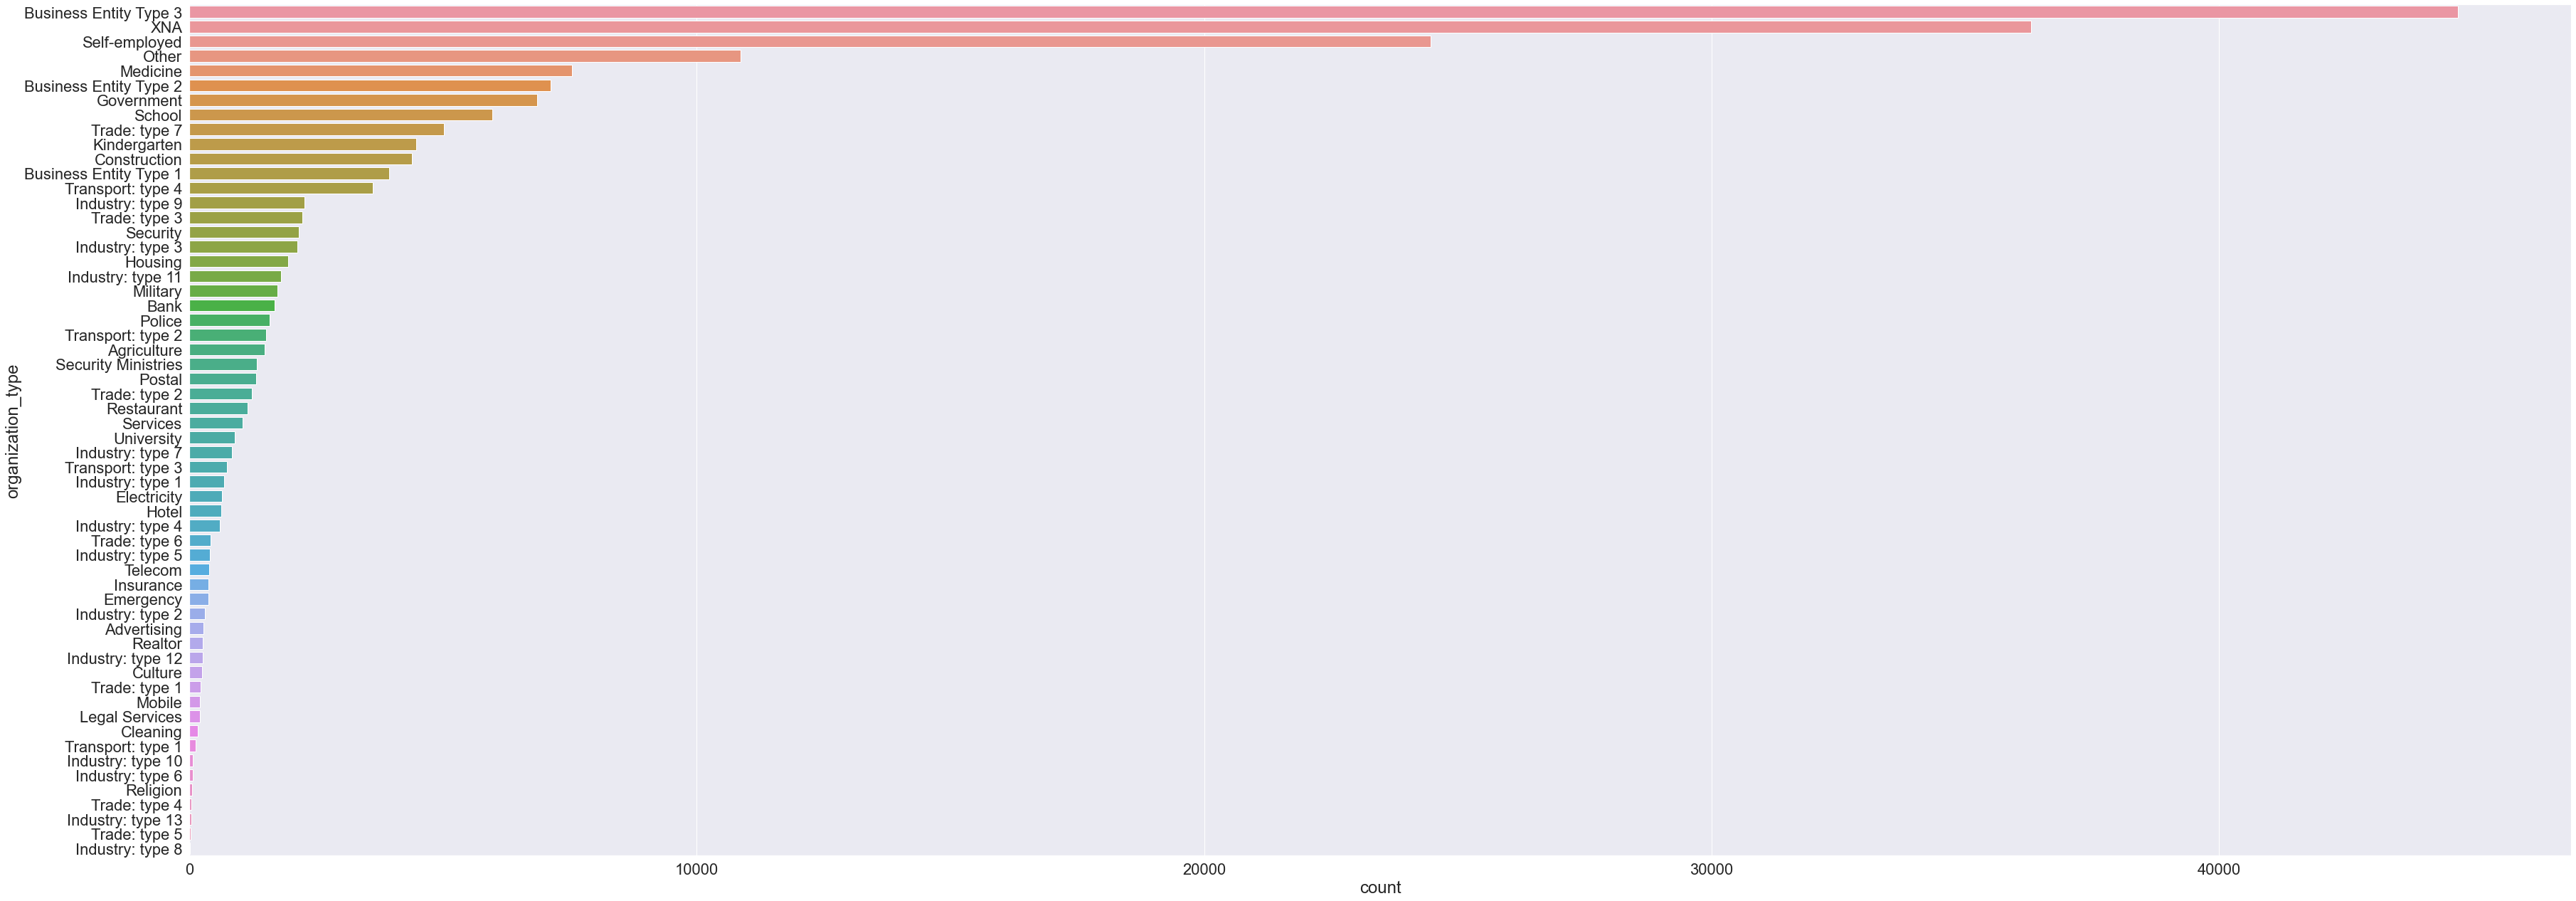

In [675]:
sns.set(font_scale = 2)
order = dfcat1['organization_type'].value_counts().index
fig = plt.figure(figsize=(60, 22))
fig.set_facecolor("#fff")
sns.countplot(data= dfcat1,y ='organization_type',order=order)            

The most frequent and 'known' organization of the customers are Business Entity Type 3,Self-employed and Medicine, the least frequent are Industry:type 13 and 8 and Trade:type 5

What is the most frequent occupation?

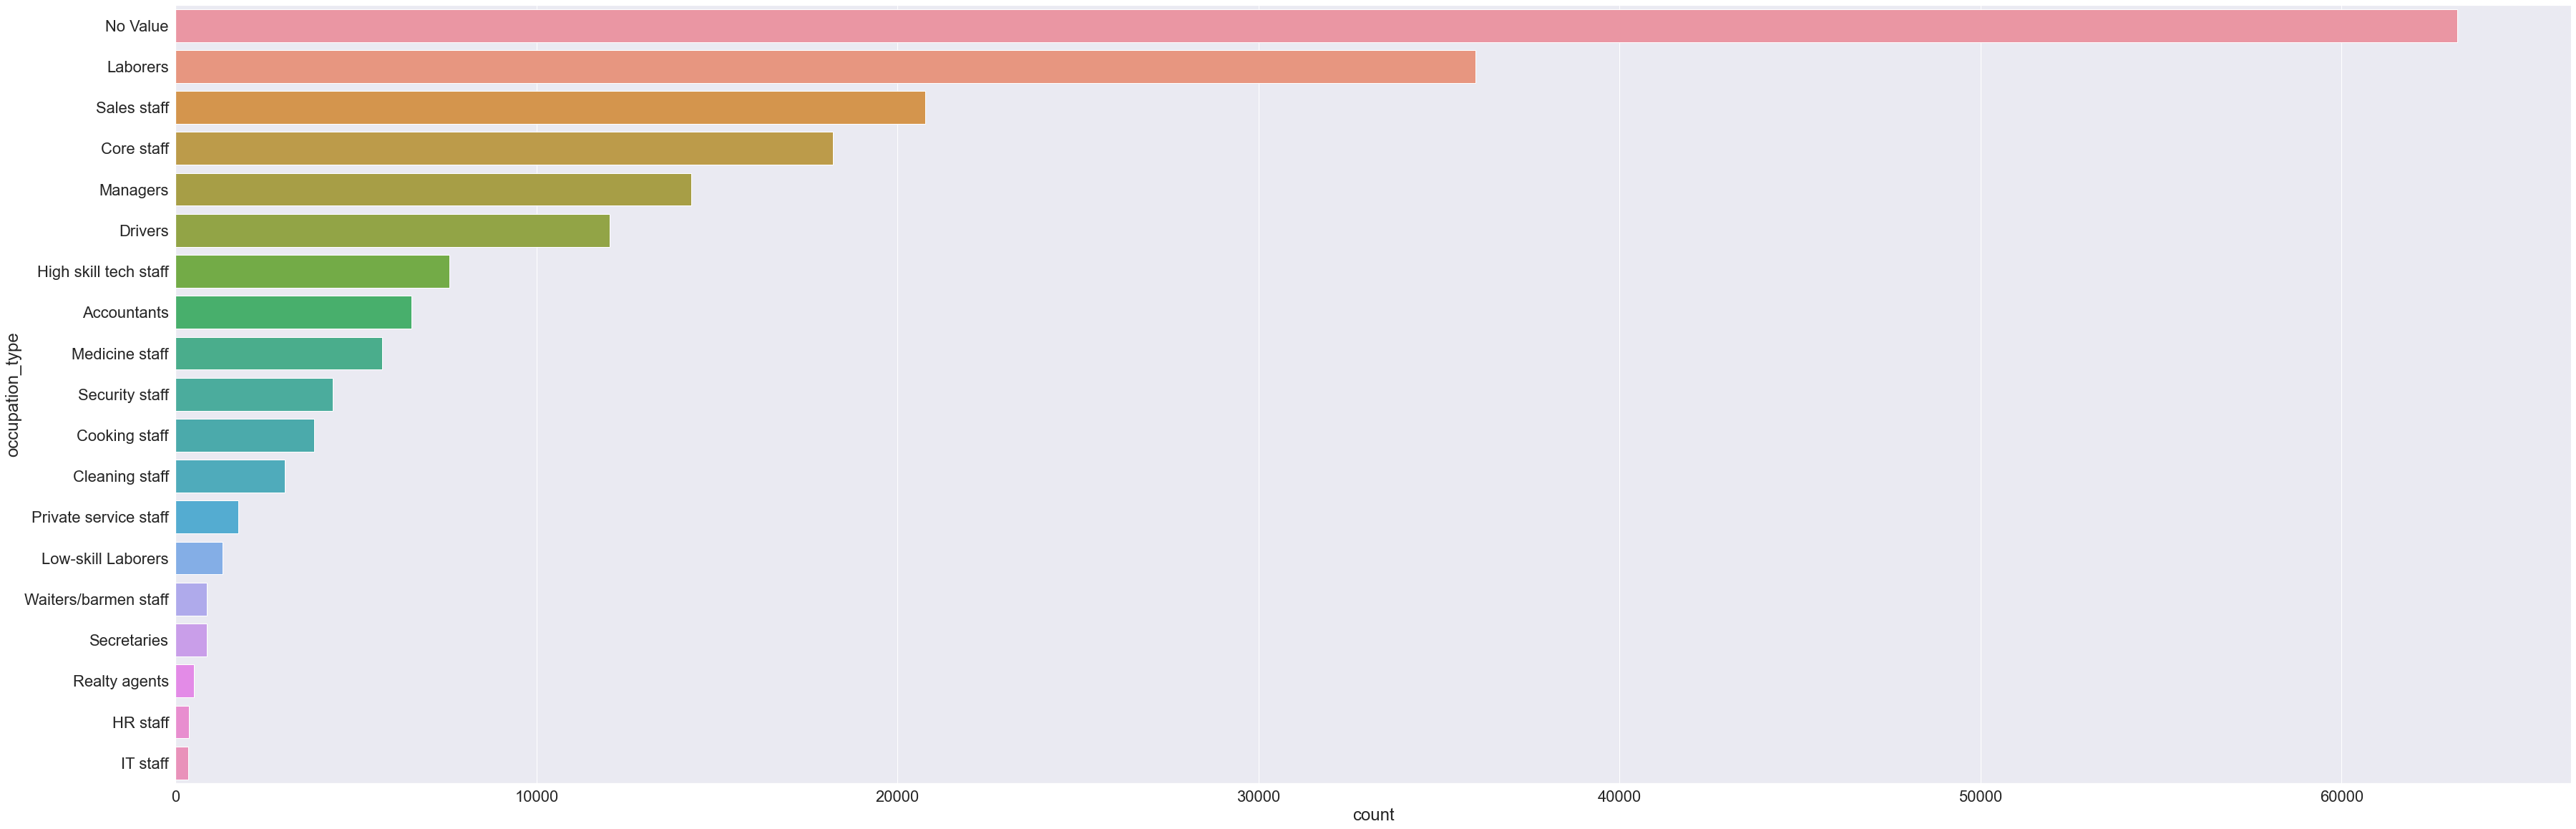

In [676]:
sns.set(font_scale = 2)
order = dfcat1['occupation_type'].value_counts().index
fig = plt.figure(figsize=(60, 20))
fig.set_facecolor("#fff")
g=sns.countplot(data= dfcat1,y ='occupation_type',order=order)
#g.fig.set_size_inches(10,8)

It seems that laborers is the most frequent known occupation, the least one is IT staff

# Checkpoint 2

In [677]:
dfcat1=dfcat1.drop(['target'],1)
df= dfcat1.merge(dfnum1, on='id')
df.shape

C:\Users\peppe\AppData\Local\Temp/ipykernel_11836/1078491361.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfcat1=dfcat1.drop(['target'],1)


(201557, 71)

Text(0, 0.5, 'Amount of credit request by occupation')

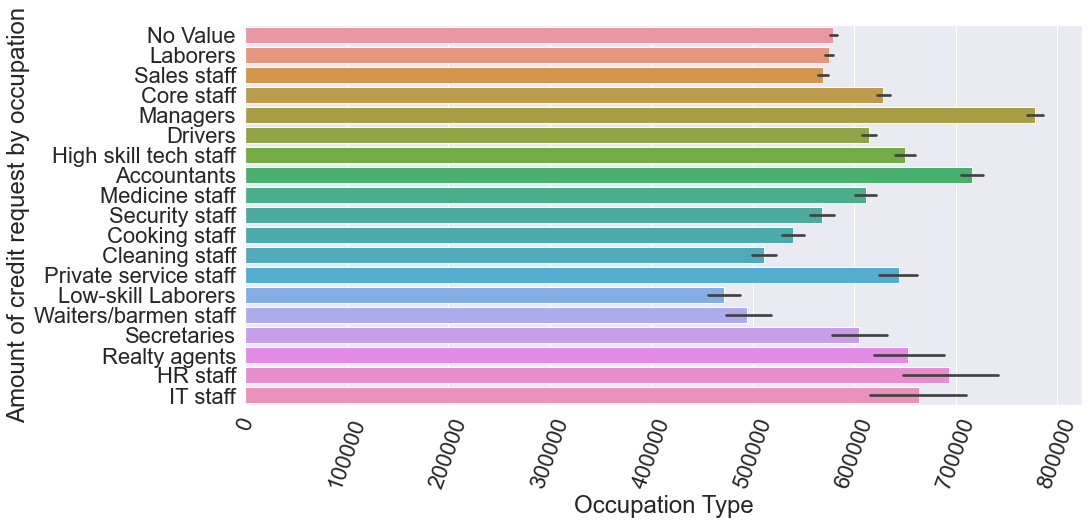

In [678]:
order = df['occupation_type'].value_counts().index
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='amt_credit',y='occupation_type',data=df,order=order)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Amount of credit request by occupation")

Seems that managers, accountants and IT staff are the ones wich asks for the larger loans, while Low-skill Laborers,Waiters/barmen staff and Cleaning staff asks for lower loans: let s look also if they repay.

What is the occupation wich repays more often and so the one that the bank can trust more ?

Let's first visualize the distribution without normalize

Text(0.5, 0, 'Occupation Type')

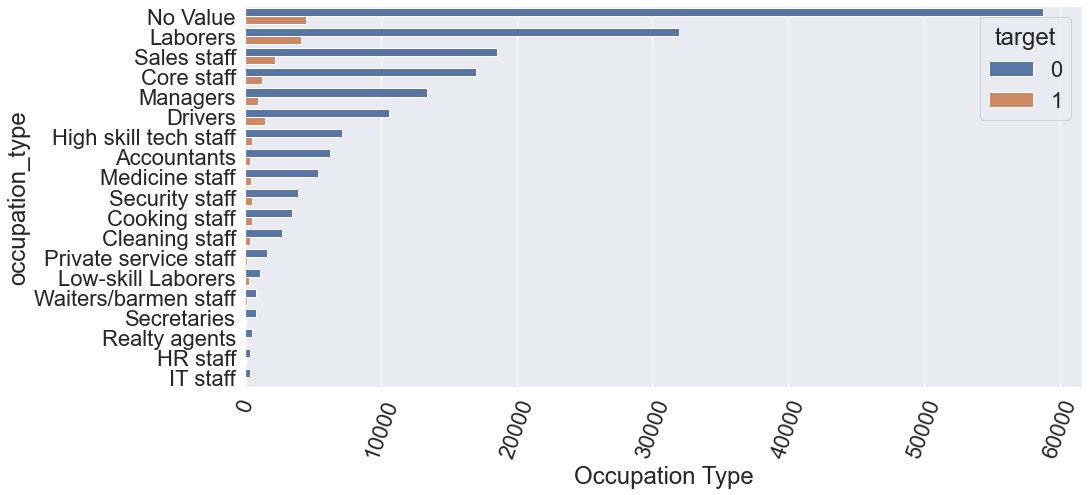

In [679]:
order = df['occupation_type'].value_counts().index
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(y='occupation_type',hue='target',data=df,order=order)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")

What is the occupation wich our bank can trust more (so wich repays the most), and the one wich our bank can trust least? Let s visualize them in %

In [680]:
sns.set(font_scale=0.7, style='whitegrid')

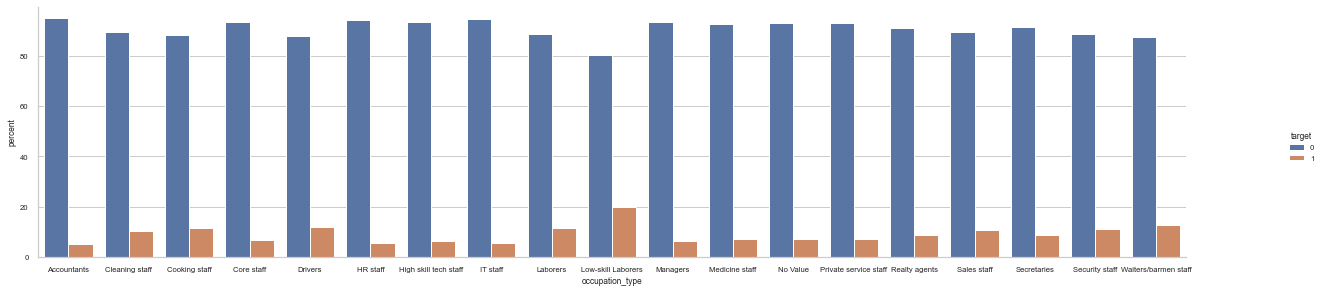

In [681]:
x,y = 'occupation_type', 'target'
(df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.gcf().set_size_inches(20, 4)#if I want to modify size, here I don' t even need to define 'g'

In [682]:
df.groupby('occupation_type')['target'].value_counts(normalize=True,ascending=True)

occupation_type        target
Accountants            1         0.051521
                       0         0.948479
Cleaning staff         1         0.104478
                       0         0.895522
Cooking staff          1         0.116285
                       0         0.883715
Core staff             1         0.065730
                       0         0.934270
Drivers                1         0.120356
                       0         0.879644
HR staff               1         0.057065
                       0         0.942935
High skill tech staff  1         0.065260
                       0         0.934740
IT staff               1         0.054441
                       0         0.945559
Laborers               1         0.113696
                       0         0.886304
Low-skill Laborers     1         0.198157
                       0         0.801843
Managers               1         0.064799
                       0         0.935201
Medicine staff         1         0.071628
    

The categories of occupations who repays the most are(the most trustables): Managers, Accountants with HR and IT staff wich are also those that asks for larger loans, while the same wich for ask for a less amount:Low-skill Laborers,Waiters/barmen and Cooking staff, are the less trustables

# Feature engineering

In [891]:
dfcat2=dfcat1.copy()
dfnum2=dfnum1.copy()

In [892]:
dfcat2['target']=dfnum2['target']
dfnum2=dfnum2.drop('target',1)
dfcat2=dfcat2.reset_index()
dfnum2=dfnum2.reset_index()

C:\Users\peppe\AppData\Local\Temp/ipykernel_11836/2272473456.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfnum2=dfnum2.drop('target',1)


# Label Encoding

Applying Label encoding for the categorical features with 2 unique values and for those with an order,one-hot encoding for the others 

In [893]:
#MAking label encoding of education type
name_education_typecat={'Lower secondary':0,'Secondary / secondary special':1,'Incomplete higher':2,'Higher education':3,'Academic degree':4}
lambda x: name_education_typecat[x]
dfcat2['name_education_type']=dfcat2['name_education_type'].apply(lambda x: name_education_typecat[x])

In [894]:
#Label encoding for the rest
le = preprocessing.LabelEncoder()
dfcat2["gender"]=le.fit_transform(dfcat2['gender'])
dfcat2["flag_own_realty"]=le.fit_transform(dfcat2['flag_own_realty'])
dfcat2["flag_own_car"]=le.fit_transform(dfcat2['flag_own_car'])

Removing some features from the couples with correlation higher than 0.9 from Correlation Matrix choosing the one with less Phi_k-correlation with the target between the 2 from both categorical and numerical dfs,also removing features for wich I did label encoding,since I added them to a separate df before performing one-hot encoding

In [895]:
dfcat2=dfcat2.drop(['live_city_not_work_city','region_rating_client_w_city','live_region_not_work_region'],1)

C:\Users\peppe\AppData\Local\Temp/ipykernel_11836/2181726231.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfcat2=dfcat2.drop(['live_city_not_work_city','region_rating_client_w_city','live_region_not_work_region'],1)


In [896]:
dfnum2=dfnum2.drop(['obs_60_cnt_social_circle','amt_goods_price'],1)

C:\Users\peppe\AppData\Local\Temp/ipykernel_11836/2943406399.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfnum2=dfnum2.drop(['obs_60_cnt_social_circle','amt_goods_price'],1)


to put in dfcat to drop#'gender','flag_own_realty','flag_own_car'

# One-hot encoding

In [897]:
dfcatencoded=pd.get_dummies(dfcat2)
dfcatencoded.shape

(201557, 161)

In [898]:
df= dfcatencoded.merge(dfnum2, on='id')
df.shape

(201557, 182)

# Checkpoint

In [899]:
df1=df.copy()

In [900]:
df1.shape

(201557, 182)

# Feature selection

In [4]:
from sklearn.feature_selection import VarianceThreshold

In [902]:
feature_selection_variance_model = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected_features_variance = feature_selection_variance_model.fit_transform(df1)

print("Original data set shape is ", df1.shape)
print("Reduced data set shape is ", X_selected_features_variance.shape)

mask = feature_selection_variance_model.get_support() #list of booleans
print("Selected features = ", df1.columns[mask])

Original data set shape is  (201557, 182)
Reduced data set shape is  (201557, 33)
Selected features =  Index(['id', 'gender', 'flag_own_car', 'flag_own_realty',
       'name_education_type', 'flag_phone', 'region_rating_client',
       'reg_city_not_work_city', 'flag_document_3',
       'name_income_type_Commercial associate', 'name_income_type_Working',
       'name_family_status_Married', 'occupation_type_No Value',
       'organization_type_Business Entity Type 3', 'housetype_mode_No Value',
       'housetype_mode_block of flats', 'wallsmaterial_mode_No Value',
       'wallsmaterial_mode_Panel', 'wallsmaterial_mode_Stone, brick',
       'cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity',
       'days_age', 'days_employment', 'days_id_publish', 'cnt_fam_members',
       'hour_appr_process_start', 'obs_30_cnt_social_circle',
       'def_30_cnt_social_circle', 'amt_req_credit_bureau_mon',
       'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year'],
      dtype='objec

In [903]:
df1list=df1.columns.to_list()
df1masked=['id', 'gender', 'flag_own_car', 'flag_own_realty',
       'name_education_type', 'flag_phone', 'region_rating_client',
       'reg_city_not_work_city', 'flag_document_3',
       'name_income_type_Commercial associate', 'name_income_type_Working',
       'name_family_status_Married', 'occupation_type_No Value',
       'organization_type_Business Entity Type 3', 'housetype_mode_No Value',
       'housetype_mode_block of flats', 'wallsmaterial_mode_No Value',
       'wallsmaterial_mode_Panel', 'wallsmaterial_mode_Stone, brick',
       'cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity',
       'days_age', 'days_employment', 'days_id_publish', 'cnt_fam_members',
       'hour_appr_process_start', 'obs_30_cnt_social_circle',
       'def_30_cnt_social_circle', 'amt_req_credit_bureau_mon',
       'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year','target']

Creating the final df by filtering so we have only those columns

In [904]:
for col in df1list:
    if col not in df1masked:
        df1=df1.drop(col,1)
df1.shape

C:\Users\peppe\AppData\Local\Temp/ipykernel_11836/3461622917.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1=df1.drop(col,1)


(201557, 34)

In [905]:
df=df1.copy()
df=df.set_index('id')
print(df.shape)
df.head()

(201557, 33)


,gender,flag_own_car,flag_own_realty,name_education_type,flag_phone,region_rating_client,reg_city_not_work_city,flag_document_3,target,name_income_type_Commercial associate,name_income_type_Working,name_family_status_Married,occupation_type_No Value,organization_type_Business Entity Type 3,housetype_mode_No Value,housetype_mode_block of flats,wallsmaterial_mode_No Value,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",cnt_children,amt_income_total,amt_credit,amt_annuity,days_age,days_employment,days_id_publish,cnt_fam_members,hour_appr_process_start,obs_30_cnt_social_circle,def_30_cnt_social_circle,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
160132,0,0,1,1,0,2,0,1,0,0,0,0,1,0,1,0,1,0,0,0,427500.0,1288350.0,37800.0,-22008,365243,-4584,1.0,15,0.0,0.0,0.000000,0.000000,5.000000
233132,1,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,180000.0,848745.0,40963.5,-8506,-313,-1172,1.0,12,2.0,0.0,0.268352,0.265313,1.901606
307771,1,1,1,1,0,2,1,1,0,0,1,1,0,0,0,1,0,1,0,1,112500.0,385164.0,19795.5,-11579,-2651,-3736,3.0,13,0.0,0.0,0.000000,0.000000,4.000000
376452,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,540000.0,1433520.0,60867.0,-21179,365243,-4628,2.0,16,0.0,0.0,0.000000,0.000000,0.000000
405403,1,1,1,1,0,3,0,0,0,0,1,1,0,0,1,0,1,0,0,0,76500.0,900000.0,26316.0,-21210,-13767,-4427,2.0,9,0.0,0.0,3.000000,0.000000,2.000000


## Sezione 2: Modelling##

* Build a **predictive model** on `develop` set aimed to predict the fault risk
* Apply this model to the `test` set and evaluate it by using the **AUC ROC statistic**
* **Apply the model** to the `validation` set 

The final evaluation will be based on the **AUC ROC statistic** computed on the validation set

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from numpy import sqrt
from numpy import argmax
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score

Why logistic regression?

Logistic regression is easier to implement, interpret, and very efficient to train.
It doesn' t require a big effort in terms of computational complexity, 
It can be adjusted with class weights since we are facing an imbalanced dataset

In [907]:
class_name='target'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In order to follow with the classification we need to understand wich metrics to optimize: since we have an imbalanced dataset we should determine if we prefer to not make mistakes in classifying the minority class,because otherwise we would accept the loan to someone who can' t pay it, and doing so we prefere to optimize the precision, or to give same importance to not accepting the loan who someone who can' t pay it and denying it to someone who can pay, preferring to optimize in that case the F-1 score.
It was decided to choose for optimizing the precision

Choosing the weight in order to obtain the best precision

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\peppe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

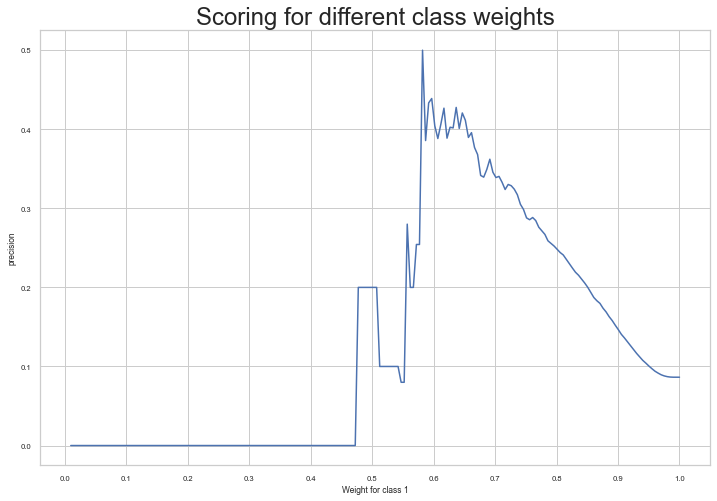

In [908]:
lr = linear_model.LogisticRegression(solver='liblinear')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'penalty':['l1'],'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1,
                          scoring='precision',
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('precision')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [909]:
weigh_data

,score,weight
0,0.086403,1.000000
1,0.086403,0.995025
2,0.086417,0.990050
3,0.086592,0.985075
4,0.087123,0.980101
5,0.088081,0.975126
6,0.089505,0.970151
7,0.091623,0.965176
8,0.093993,0.960201
9,0.097150,0.955226


At iteration numer 84 class 1 has a weight of 0.582111 (this means that class 0 has a weight of 0.417889)  to get the best possible precision wich is 0.5

Tuning the threshold in order to obtain the largest G-Mean value, a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity. 

Choosing the regularization method 'ridge' in order toavoiding overfitting

Best Threshold=0.117440, G-Mean=0.628


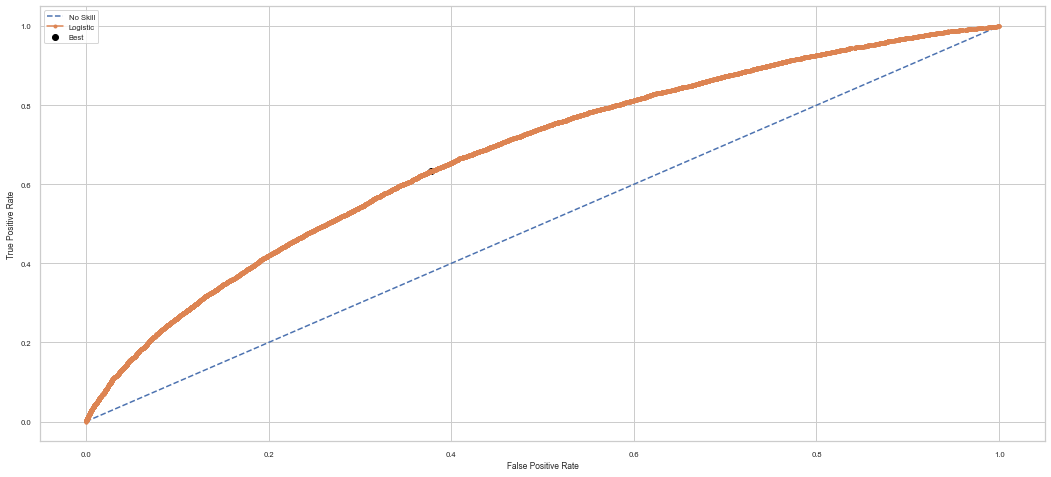

AUC: 0.67


In [923]:
model = LogisticRegression(solver='liblinear', class_weight={0: 0.417889, 1:0.582111 },penalty='l1')
model.fit(X_train, y_train)
# predict probabilities
yprob = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yprob=yprob[:,1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yprob)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
print("AUC:", round(roc_auc_score(y_test, yprob),2))

In [928]:
th = 0.117702
pd.DataFrame(confusion_matrix(y_test, yprob > th),
             index = ['class 0 actual', 'class 1 actual'],
             columns = ['class 0 pred', 'class 1 pred'])

,class 0 pred,class 1 pred
class 0 actual,45946,27678
class 1 actual,2581,4418


In [950]:
print('Accuracy %s' % accuracy_score(y_test, yprob>th ))
print('F1-score %s' % f1_score(y_test, yprob>th , average=None))
print(classification_report(y_test, yprob>th ))

Accuracy 0.6246852635104126
F1-score [0.75228201 0.22601356]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     73624
           1       0.14      0.63      0.23      6999

    accuracy                           0.62     80623
   macro avg       0.54      0.63      0.49     80623
weighted avg       0.88      0.62      0.71     80623



SAVING MY MODEL

In [6]:
import pickle

In [948]:
# save the model to disk
filename = 'logistic_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
'''# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)'''

# Applying the model to the 'validazione.csv'

The dataset 'validazione.csv' has 92254 and 102 columns

In [911]:
dfval = pd.read_csv('validazione.csv')
print(dfval.shape)
dfval.head()

(92254, 102)


,ID,NAME_CONTRACT_TYPE,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_AGE,DAYS_EMPLOYMENT,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BUILD_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BUILD_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BUILD_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_4
0,280205,Cash loans,M,Y,Y,0,112500.0,180000.0,12928.5,180000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-17571,-290,-1082,25.0,1,1,0,1,1,0,Sales staff,2.0,2,2,SATURDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.537010,0.727768,NaN,0.0701,NaN,0.0,0.1379,0.1667,NaN,0.0463,NaN,0.2060,0.0714,NaN,0.0000,0.1379,0.1667,NaN,0.0482,NaN,0.2181,0.0708,NaN,0.0,0.1379,0.1667,NaN,0.0471,NaN,0.2103,block of flats,0.0812,"Stone, brick",3.0,0.0,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.336738
1,178265,Cash loans,M,Y,N,2,157500.0,675000.0,34465.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-1687,-4781,21.0,1,1,1,1,1,0,Security staff,4.0,2,2,TUESDAY,12,0,1,1,1,1,1,Business Entity Type 3,NaN,0.331222,0.340828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.257440
2,119641,Cash loans,F,N,Y,0,112500.0,622188.0,26284.5,472500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,-13916,-7307,-4609,NaN,1,1,0,1,1,0,Laborers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Industry: type 3,0.635203,0.529903,0.102798,NaN,NaN,NaN,0.0690,0.0417,NaN,0.0125,NaN,NaN,NaN,NaN,NaN,0.0690,0.0417,NaN,0.0130,NaN,NaN,NaN,NaN,NaN,0.0690,0.0417,NaN,0.0127,NaN,NaN,NaN,0.0106,"Stone, brick",2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0.144186
3,294616,Cash loans,M,Y,N,0,202500.0,545040.0,25537.5,450000.0,Family,State servant,Secondary / secondary special,Civil marriage,House / apartment,-8661,-623,-1344,6.0,1,1,1,1,0,0,Core staff,2.0,1,1,THURSDAY,14,0,1,1,0,1,1,Police,0.290311,0.527783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.519098
4,145313,Cash loans,F,N,Y,0,180000.0,539100.0,26064.0,450000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-20798,365243,-4194,NaN,1,0,0,1,1,0,NaN,2.0,2,2,THURSD

Removing the columns and applying same imputation and transformation methods to the 'validazione.csv'

In [912]:
categorical_columns = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                   'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                                  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                                'LIVE_CITY_NOT_WORK_CITY'] + ['FLAG_DOCUMENT_' + str(i) for i in range(2,22)] + dfval.dtypes[
                                    dfval.dtypes == 'object'].index.tolist()
dfnum=dfval.drop(categorical_columns,axis=1)
dfnum=dfnum.dropna(thresh=thresholdfornan(dfnum,30),axis=1)
for column in dfnum:
    dfnum[column]=dfnum[column].fillna(dfnum[column].mean())
numerical_columns=dfval.columns.to_list()
for col in categorical_columns:
    if col in numerical_columns:
        numerical_columns.remove(col)
dfcat=dfval.drop(numerical_columns,1)
for column in dfcat:
    if dfcat[column].isna().sum() >= thresholdfornancat(dfcat,30):
        dfcat[column]=dfcat[column].replace(np.nan, 'No Value')
    else:
        dfcat[column]=dfcat[column].fillna(dfcat[column].mode().iloc[0])
dfcat['ID']=dfnum['ID']
dfnum=dfnum.set_index('ID')
dfcat=dfcat.set_index('ID')
dfcat2=dfcat.copy()
dfnum2=dfnum.copy()
dfnum2.columns= map(str.lower, dfnum2.columns)
dfcat2.columns= map(str.lower, dfcat2.columns)
dfcat2=dfcat2.reset_index()
dfnum2=dfnum2.reset_index()
#MAking label encoding of education type
name_education_typecat={'Lower secondary':0,'Secondary / secondary special':1,'Incomplete higher':2,'Higher education':3,'Academic degree':4}
lambda x: name_education_typecat[x]
dfcat2['name_education_type']=dfcat2['name_education_type'].apply(lambda x: name_education_typecat[x])                 
#Label encoding for the rest
le = preprocessing.LabelEncoder()
dfcat2["gender"]=le.fit_transform(dfcat2['gender'])
dfcat2["flag_own_realty"]=le.fit_transform(dfcat2['flag_own_realty'])
dfcat2["flag_own_car"]=le.fit_transform(dfcat2['flag_own_car'])                 
dfcat2=dfcat2.drop(['live_city_not_work_city','region_rating_client_w_city','live_region_not_work_region'],1)                 
dfnum2=dfnum2.drop(['obs_60_cnt_social_circle','amt_goods_price'],1)                 
dfcatencoded=pd.get_dummies(dfcat2)                 
dfval= dfcatencoded.merge(dfnum2, on='ID')
dfvallist=dfval.columns.to_list()
df1masked=['ID', 'gender', 'flag_own_car', 'flag_own_realty',
       'name_education_type', 'flag_phone', 'region_rating_client',
       'reg_city_not_work_city', 'flag_document_3',
       'name_income_type_Commercial associate', 'name_income_type_Working',
       'name_family_status_Married', 'occupation_type_No Value',
       'organization_type_Business Entity Type 3', 'housetype_mode_No Value',
       'housetype_mode_block of flats', 'wallsmaterial_mode_No Value',
       'wallsmaterial_mode_Panel', 'wallsmaterial_mode_Stone, brick',
       'cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity',
       'days_age', 'days_employment', 'days_id_publish', 'cnt_fam_members',
       'hour_appr_process_start', 'obs_30_cnt_social_circle',
       'def_30_cnt_social_circle', 'amt_req_credit_bureau_mon',
       'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year']
for col in dfvallist:
    if col not in df1masked:
        dfval=dfval.drop(col,1)
dfval=dfval.set_index('ID')
print(dfval.shape)
dfval.head()  

C:\Users\peppe\AppData\Local\Temp/ipykernel_11836/1609006438.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfcat=dfval.drop(numerical_columns,1)
C:\Users\peppe\AppData\Local\Temp/ipykernel_11836/1609006438.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfcat2=dfcat2.drop(['live_city_not_work_city','region_rating_client_w_city','live_region_not_work_region'],1)
C:\Users\peppe\AppData\Local\Temp/ipykernel_11836/1609006438.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfnum2=dfnum2.drop(['obs_60_cnt_social_circle','amt_goods_price'],1)
C:\Users\peppe\AppData\Local\Temp/ipykernel_11836/1609006438.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' wi

(92254, 32)


,gender,flag_own_car,flag_own_realty,name_education_type,flag_phone,region_rating_client,reg_city_not_work_city,flag_document_3,name_income_type_Commercial associate,name_income_type_Working,name_family_status_Married,occupation_type_No Value,organization_type_Business Entity Type 3,housetype_mode_No Value,housetype_mode_block of flats,wallsmaterial_mode_No Value,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",cnt_children,amt_income_total,amt_credit,amt_annuity,days_age,days_employment,days_id_publish,cnt_fam_members,hour_appr_process_start,obs_30_cnt_social_circle,def_30_cnt_social_circle,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
280205,1,1,1,3,1,2,0,1,1,0,1,0,1,0,1,0,0,1,0,112500.0,180000.0,12928.5,-17571,-290,-1082,2.0,11,3.0,0.0,0.265577,0.265965,1.89742
178265,1,1,0,1,1,2,1,1,1,0,1,0,1,1,0,1,0,0,2,157500.0,675000.0,34465.5,-15743,-1687,-4781,4.0,12,5.0,0.0,0.000000,0.000000,2.00000
119641,0,0,1,1,1,2,0,1,0,1,1,0,0,1,0,0,0,1,0,112500.0,622188.0,26284.5,-13916,-7307,-4609,2.0,13,2.0,0.0,1.000000,0.000000,2.00000
294616,1,1,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,202500.0,545040.0,25537.5,-8661,-623,-1344,2.0,14,0.0,0.0,1.000000,0.000000,1.00000
145313,0,0,1,1,1,2,0,0,0,0,1,1,0,0,1,0,1,0,0,180000.0,539100.0,26064.0,-20798,365243,-4194,2.0,8,0.0,0.0,0.000000,0.000000,1.00000


In [951]:
'''features=['col' + str(i) for i in range(1,33)]
Xnew=dfval[features].values
ynew=dfval['target'].values  # Labels
#y_prednew=lr.predict(Xnew)'''

"features=['col' + str(i) for i in range(1,33)]\nXnew=dfval[features].values\nynew=dfval['target'].values  # Labels\n#y_prednew=lr.predict(Xnew)"

In [ ]:
#dfprova=df

In [ ]:
'''yprob = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yprob=yprob[:,1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yprob)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
print("AUC:", round(roc_auc_score(y_test, yprob),2))'''

In [ ]:
'''print(classification_report(y_test, yprob > th))

print("AUC:", round(roc_auc_score(y_test, yprob),2))

pd.DataFrame(confusion_matrix(y_test_credit, yprob > th),
             index = ['class 0 actual', 'class 1 actual'],
             columns = ['class 0 pred', 'class 1 pred'])'''

In [ ]:
print("AUC:", round(roc_auc_score(y_test_credit, yprob_rand),2))
get_roc_curve_plot(y_obs, y_prob)